In [1]:
import pickle

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Setup Data
from utils.data import fires, FEATURE_NAMES
from utils.visualization import plot_decisions


%matplotlib inline

In [2]:
X, y_log = fires[FEATURE_NAMES], fires["log(area+1)"]

## Parameter Tuning

In [3]:
C_range = np.linspace(0.1, 2, num=10)
epsilon_range = np.linspace(0.1, 2, num=10)
gamma_range = np.linspace(0.1, 1_000, num=10)


In [4]:
grid_search = GridSearchCV(
    SVR(),
    param_grid={"C": C_range,
                "epsilon": epsilon_range,
                "gamma": gamma_range},
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
)

In [5]:
grid_search.fit(X, y_log)

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([0.1    , 0.31111, 0.52222, 0.73333, 0.94444, 1.15556, 1.36667,
       1.57778, 1.78889, 2.     ]), 'epsilon': array([0.1    , 0.31111, 0.52222, 0.73333, 0.94444, 1.15556, 1.36667,
       1.57778, 1.78889, 2.     ]), 'gamma': array([1.000e-01, 1.112e+02, 2.223e+02, 3.334e+02, 4.445e+02, 5.556e+02,
       6.667e+02, 7.778e+02, 8.889e+02, 1.000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [6]:
grid_search.best_estimator_

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.5222222222222223,
  gamma=1000.0, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)

In [7]:
grid_search.best_score_

-1.1189694181185414

## Visualize Decisions

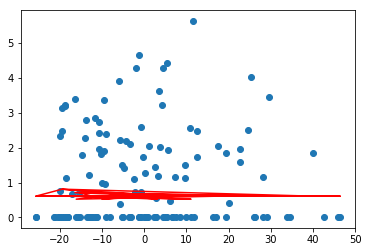

In [8]:
plot_decisions(grid_search.best_estimator_, X, y_log)

## Saving the model

In [9]:
with open("./svm.b", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)